In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [109]:
df = pd.read_csv("C:/Kumaresh project/bengaluru_house_prices.csv")

In [110]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [111]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [112]:
header = (['Area_type', 'Availability', 'Location', 'Size', 'Society',
       'Total_sqft', 'Bath', 'Balcony', 'Price'])

In [113]:
df.columns = header

In [114]:
df.head(5)

,Area_type,Availability,Location,Size,Society,Total_sqft,Bath,Balcony,Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [115]:
df.dtypes

Area_type        object
Availability     object
Location         object
Size             object
Society          object
Total_sqft       object
Bath            float64
Balcony         float64
Price           float64
dtype: object

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area_type     13320 non-null  object 
 1   Availability  13320 non-null  object 
 2   Location      13319 non-null  object 
 3   Size          13304 non-null  object 
 4   Society       7818 non-null   object 
 5   Total_sqft    13320 non-null  object 
 6   Bath          13247 non-null  float64
 7   Balcony       12711 non-null  float64
 8   Price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [117]:
df.describe()

,Bath,Balcony,Price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [118]:
df.index

RangeIndex(start=0, stop=13320, step=1)

In [119]:
df.shape

(13320, 9)

In [120]:
df.isnull().sum()

Area_type          0
Availability       0
Location           1
Size              16
Society         5502
Total_sqft         0
Bath              73
Balcony          609
Price              0
dtype: int64

In [121]:
df['Location'].isnull().sum()

1

In [122]:
df = df.dropna()

In [123]:
df.shape

(7496, 9)

In [124]:
df.duplicated().sum()

352

In [125]:
df = df.drop_duplicates()

In [126]:
df.shape

(7144, 9)

In [127]:
df.head(5)

,Area_type,Availability,Location,Size,Society,Total_sqft,Bath,Balcony,Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,Prrry M,2785,5.0,3.0,295.00


In [128]:
df['Society'].value_counts()

Society
GrrvaGr    68
PrarePa    58
Sryalan    56
Prtates    53
GMown E    52
           ..
SLnorMa     1
TGjraVa     1
SrageGl     1
Apavea      1
RSntsAp     1
Name: count, Length: 2592, dtype: int64

In [129]:
import re
df['Society'] = df['Society'].apply(lambda name: re.sub(r'\d+(\.\d+)?\s?★', '', str(name)).strip()).str.lower()

In [130]:
df['Society'].value_counts().shape

(2589,)

In [131]:
df['Society'] = df['Society'].str.replace('nan','independent')


In [132]:
df.head()

,Area_type,Availability,Location,Size,Society,Total_sqft,Bath,Balcony,Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,duenata,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,prrry m,2785,5.0,3.0,295.00


In [133]:
df['Price'].value_counts()

Price
75.00     173
65.00     167
55.00     154
60.00     150
45.00     141
         ... 
42.41       1
71.32       1
35.52       1
20.50       1
488.00      1
Name: count, Length: 1518, dtype: int64

In [134]:
df = df[df['Price'] != 'Price on Request']

In [135]:
df.head()

,Area_type,Availability,Location,Size,Society,Total_sqft,Bath,Balcony,Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,theanmp,2600,5.0,3.0,120.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,soiewre,1521,3.0,1.0,95.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,duenata,1170,2.0,1.0,38.00
11,Plot Area,Ready To Move,Whitefield,4 Bedroom,prrry m,2785,5.0,3.0,295.00


In [136]:
def treat_price(x):
    if isinstance(x, float):  # if already numeric
        return x
    
    parts = x.split()  # e.g. "75 Lac" -> ["75", "Lac"]
    value = float(parts[0])
    unit = parts[1]
    
    if unit == 'Lac':
        return round(value * 100000, 2)   # convert to number of rupees
    elif unit == 'Cr':
        return round(value * 10000000, 2) # convert to number of rupees
    else:
        return None  # in case of unknown unit


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7144 entries, 0 to 13318
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area_type     7144 non-null   object 
 1   Availability  7144 non-null   object 
 2   Location      7144 non-null   object 
 3   Size          7144 non-null   object 
 4   Society       7144 non-null   object 
 5   Total_sqft    7144 non-null   object 
 6   Bath          7144 non-null   float64
 7   Balcony       7144 non-null   float64
 8   Price         7144 non-null   float64
dtypes: float64(3), object(6)
memory usage: 558.1+ KB


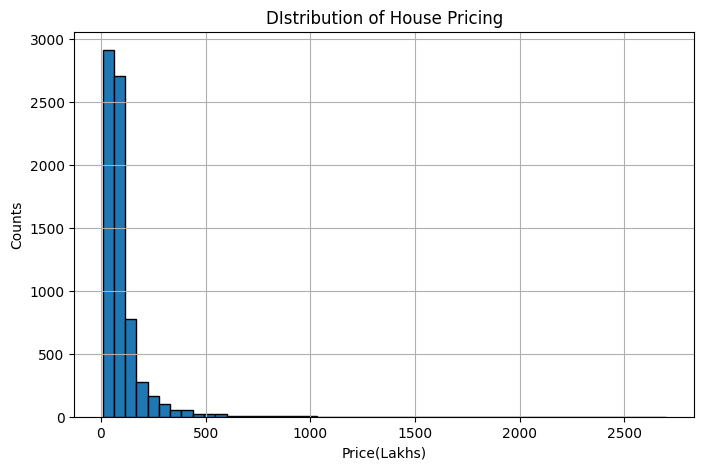

In [191]:
# single variable numerical plot

plt.figure(figsize=(8,5))
df['Price'].hist(bins = 50, edgecolor = 'black')
plt.title('DIstribution of House Pricing')
plt.xlabel('Price(Lakhs)')
plt.ylabel('Counts')
plt.show()

In [183]:
df['Area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [193]:
df['Area_type'].value_counts()


Area_type
Super built-up  Area    5672
Built-up  Area          1152
Plot  Area               268
Carpet  Area              52
Name: count, dtype: int64

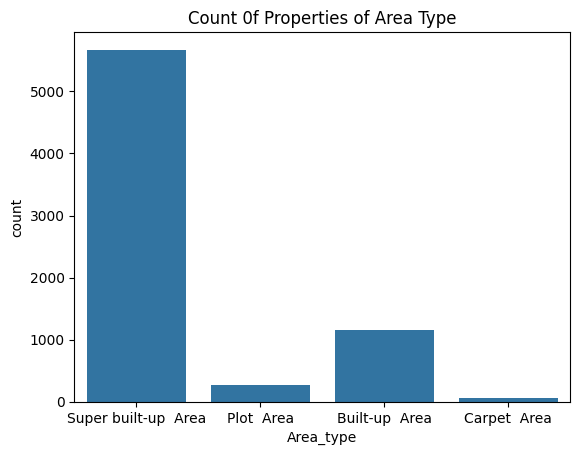

In [217]:
#Categorical plot

sns.countplot(x = 'Area_type', data = df)
plt.title('Count 0f Properties of Area Type')
plt.show()

In [225]:
df['Total_sqft'] = pd.to_numeric(df['Total_sqft'], errors='coerce')


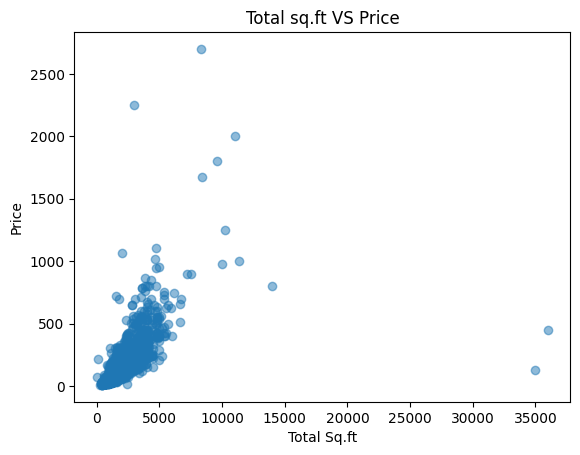

In [235]:
# two variable numerical ------> numerical

plt.scatter(df['Total_sqft'], df['Price'], alpha = 0.5)
plt.xlabel('Total Sq.ft')
plt.ylabel('Price')
plt.title('Total sq.ft VS Price')
plt.show()

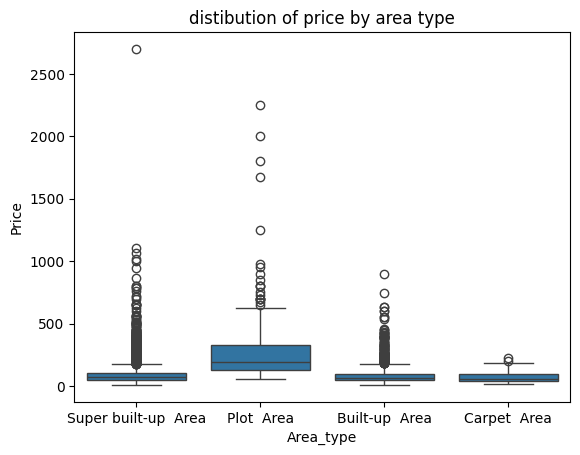

In [237]:
# categorical ----> numerical boxplot

sns.boxplot(x = 'Area_type', y = 'Price', data = df)
plt.title('distibution of price by area type')
plt.show()

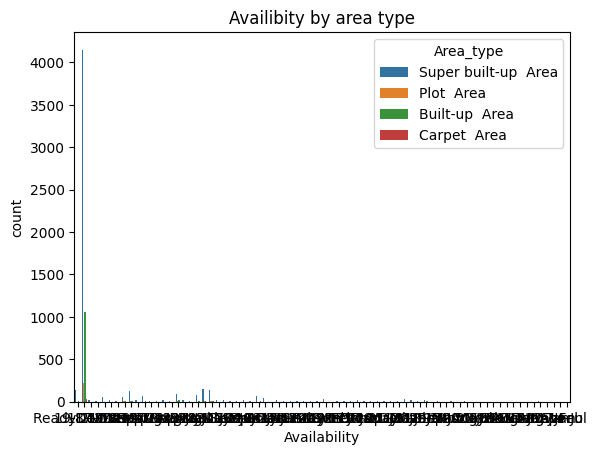

In [251]:
# categorical -----> categorical

sns.countplot(x = 'Availability', hue = 'Area_type', data = df)
plt.title('Availibity by area type')
plt.show()